# Aula 3 - Machine Learning

# Demo 5 - Machine Learning - K Nearest Neighbors com Python

Vamos tentar usar o KNN para criar um modelo que prevê diretamente uma classe para um novo ponto de dados baseado em nossos atributos.

O Algoritmo K-Nearest Neighbours é muito intuitivo na forma de classificar dados. Em essência, o algoritmo examinará em que tipo de classe os K vizinhos mais próximos pertencem para qualquer novo ponto de dados.

Primeiro, importaremos todas as bibliotecas necessárias e depois leremos e trabalharemos nossos dados.


## Importando nossas bibliotecas



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Trabalhando com nossos dados

Dica: Configure index_col = 0 para usar a primeira coluna como o índice!

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving DadosKNN to DadosKNN
Arquivo "DadosKNN" importado pelo usuário com tamanho de 195324 bytes


In [3]:
df = pd.read_csv("DadosKNN",index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


O conjunto de dados foi anonimizado. Por isso, não sabemos quais atributos estão sendo trabalhados,  nem sabemos o que nossa classe alvo representa.

## Padronizando nossas variáveis

Como o classificador KNN prediz a classe de uma determinada observação de teste identificando as observações mais próximas, a escala das variáveis é importante.

Quaisquer variáveis que estão em grande escala terão um efeito muito maior na distância entre as observações e, portanto, no classificador KNN, do que as variáveis que estão em pequena escala.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510



## Construindo nossa amostra de treinamento

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Usando o KNN

Lembre-se de que estamos tentando criar um modelo para prever se alguém terá ou não a nossa classe alvo (TARGET CLASS).

Nós começaremos com k = 1.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

## Predições e avaliação

Chegou a hora de avaliar nosso modelo!

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[138  12]
 [ 11 139]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       150
           1       0.92      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Escolhendo um valor de K

Utilizaremos o "método do cotovelo" (elbow method) para escolhermos um bom valor de K.

Obs: Aqui usamos Valores de Erro x Valores de K, também poderíamos utilizar a variância;

Obs2: Mais informações quanto ao método do cotovelo - https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [19]:
error_rate = []

# Pode demorar algum tempo
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Taxa de Erro')

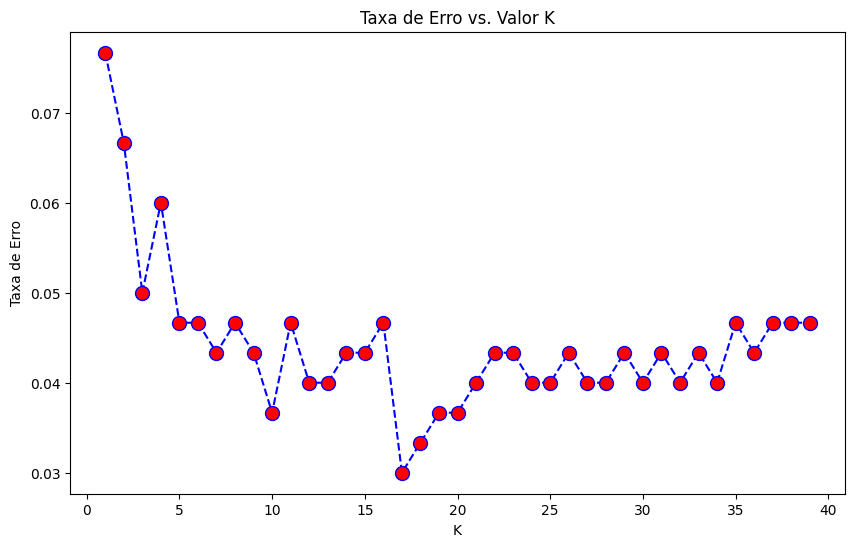

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de Erro vs. Valor K')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')

Aqui podemos ver que depois de aproximadamente K> 23 a taxa de erro tende a pairar em torno de 0.06-0.05.

Vamos retreinar o modelo com esse valor e verificar o relatório de classificação!





In [21]:
# Comparação com nosso original com K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Com K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Com K=1


[[138  12]
 [ 11 139]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.92       150
           1       0.92      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [22]:
# Com K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Com K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Com K=23


[[145   5]
 [  8 142]]


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       150
           1       0.97      0.95      0.96       150

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

